In [19]:
import pickle
with open('donnees_annees.pkl', 'rb') as fichier:
    annees = pickle.load(fichier)
with open('donnees_nb_date.pkl', 'rb') as fichier:
    comptage_dates = pickle.load(fichier)

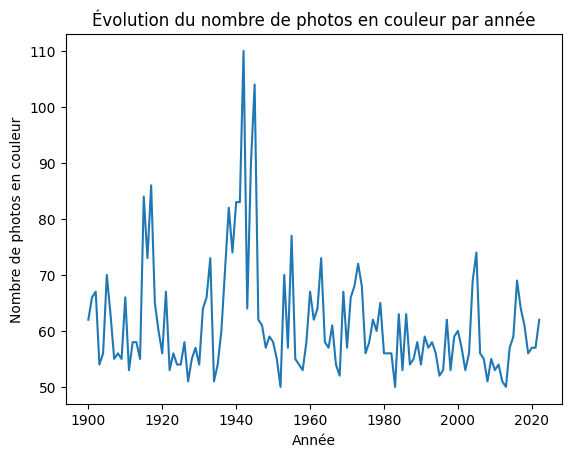

In [10]:
import os
import cv2
import matplotlib.pyplot as plt
import time
temps_debut = time.time()
def est_noir_et_blanc(image_path):
    img = cv2.imread(image_path)
    if len(img.shape) == 2:
        return True
    else:
        return False

# Chemin vers le dossier contenant les photos
dossier_photos = r"C:\Users\chris\OneDrive\Documents\Python Scripts\chronophoto\photos"

annees = range(1900, 2023)
couleur_par_annee = {}

# Parcourir toutes les années
for annee in annees:
    couleur_par_annee[annee] = 0
    
    # Parcourir tous les fichiers dans le dossier
    for fichier in os.listdir(dossier_photos):
        if fichier.lower().endswith((".jpg", ".jpeg")):
            # Extraire l'année du nom de fichier
            annee_fichier = int(fichier.split("-")[0])
            
            # Vérifier si l'année correspond
            if annee_fichier == annee:
                # Vérifier si l'image est en couleur
                image_path = os.path.join(dossier_photos, fichier)
                if not est_noir_et_blanc(image_path):
                    couleur_par_annee[annee] += 1

# Générer le graphique
annees = list(couleur_par_annee.keys())
nb_photos_couleur = list(couleur_par_annee.values())

plt.scatter(annees, nb_photos_couleur, marker='+')
plt.xlabel("Année")
plt.ylabel("Nombre de photos en couleur")
plt.title("Évolution du nombre de photos en couleur par année")
plt.show()


temps_fin = time.time()
temps_execution = temps_fin - temps_debut
print("Le programme a mis", temps_execution, "secondes à s'exécuter.")

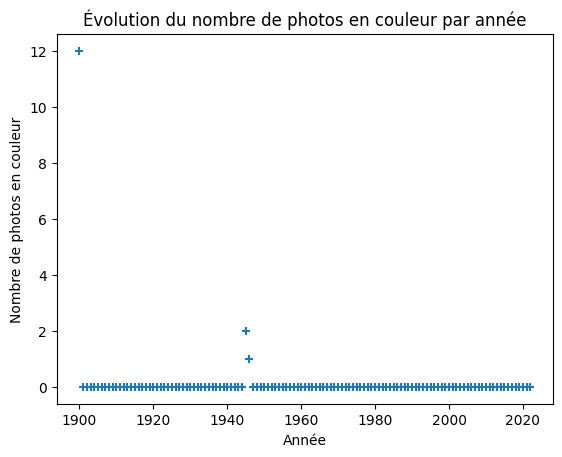

Le programme a mis 0.624852180480957 secondes à s'exécuter.


In [17]:
import os
import cv2
import matplotlib.pyplot as plt
import time
temps_debut = time.time()
def est_noir_et_blanc(image_path):
    img = cv2.imread(image_path)
    if len(img.shape) == 2:
        return True
    else:
        return False

# Chemin vers le dossier contenant les photos
dossier_photos = r"C:\Users\chris\OneDrive\Documents\Python Scripts\chronophoto\photo_test"

annees = range(1900, 2023)
couleur_par_annee = {}

# Parcourir toutes les années
for annee in annees:
    couleur_par_annee[annee] = 0
    
    # Parcourir tous les fichiers dans le dossier
    for fichier in os.listdir(dossier_photos):
        if fichier.lower().endswith((".jpg", ".jpeg")):
            # Extraire l'année du nom de fichier
            annee_fichier = int(fichier.split("-")[0])
            
            # Vérifier si l'année correspond
            if annee_fichier == annee:
                # Vérifier si l'image est en couleur
                image_path = os.path.join(dossier_photos, fichier)
                if not est_noir_et_blanc(image_path):
                    couleur_par_annee[annee] += 1

# Générer le graphique
annees = list(couleur_par_annee.keys())
nb_photos_couleur = list(couleur_par_annee.values())

plt.scatter(annees, nb_photos_couleur, marker='+')
plt.xlabel("Année")
plt.ylabel("Nombre de photos en couleur")
plt.title("Évolution du nombre de photos en couleur par année")
plt.show()


temps_fin = time.time()
temps_execution = temps_fin - temps_debut
print("Le programme a mis", temps_execution, "secondes à s'exécuter.")

Chemin de l'image en couleur : C:\Users\chris\OneDrive\Documents\Python Scripts\chronophoto\photo_test\1900-014.JPEG
Chemin de l'image en couleur : C:\Users\chris\OneDrive\Documents\Python Scripts\chronophoto\photo_test\1900-050.JPEG
Chemin de l'image en couleur : C:\Users\chris\OneDrive\Documents\Python Scripts\chronophoto\photo_test\1900-053.JPEG
Chemin de l'image en couleur : C:\Users\chris\OneDrive\Documents\Python Scripts\chronophoto\photo_test\1900-061.JPEG


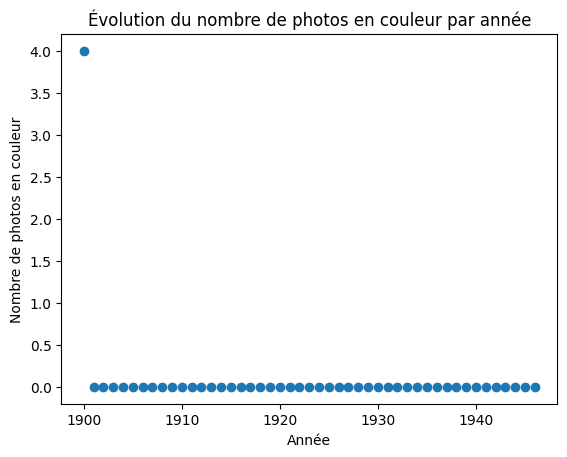

C:\Users\chris\OneDrive\Documents\Python Scripts\chronophoto\photo_test\1946-075.JPEG
Valeurs de saturation en couleur : [100.25377559055119, 109.68132334183673, 103.17191983995585, 117.26114211309523]
Valeurs de saturation en noir et blanc : [40.02352777777778, 0.0, 0.0, 0.0, 8.063753111172566, 5.168196994991653, 18.46746835443038, 43.80580734731125, 20.227201084130616, 0.0, 40.38036738351254, 0.0, 0.0, 20.2605464625132, 50.19183874139626, 20.07632196969697, 20.063260030864196, 48.60764539748954, 52.14323404785643, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 74.03359922279793, 0.0, 0.0, 49.84726662225935, 0.0, 0.0, 0.0, 0.0, 0.0, 46.85926059100419, 83.40071007268345, 0.0, 24.94772880389718, 74.39097791477994, 19.431159663865547, 0.0, 0.031373668842322226, 0.0, 0.0, 42.42676172919452, 5.3857568176498125, 0.0, 82.32912882693527, 0.0, 81.91655104378819, 52.245283225995315, 0.0, 0.0, 0.0, 78.10506313131313, 0.0, 0.0, 57.53393283472396]
Maximum de sat_NB : 83.40071007268345
Minimum de sat

In [56]:
import os
import cv2
import matplotlib.pyplot as plt
from collections import Counter

def est_noir_et_blanc(image_path):
    img = cv2.imread(image_path)
    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    saturation_mean = img_hsv[:, :, 1].mean()
    return saturation_mean < 100  # Modifier la valeur seuil de saturation selon les besoins

# Chemin vers le dossier contenant les photos
dossier_photos = r"C:\Users\chris\OneDrive\Documents\Python Scripts\chronophoto\photo_test"

annees = range(1900, 1947)
couleur_par_annee = {}
sat_couleur = []
sat_NB = []

# Comptage du nombre total de photos pour chaque année
comptage_dates = Counter()

# Parcourir tous les fichiers dans le dossier
for fichier in os.listdir(dossier_photos):
    if fichier.lower().endswith((".jpg", ".jpeg")):
        # Extraire l'année du nom de fichier
        annee_fichier = int(fichier.split("-")[0])
        
        # Comptage du nombre de photos par année
        comptage_dates[annee_fichier] += 1

# Parcourir toutes les années
for annee in annees:
    couleur_par_annee[annee] = 0
    
    # Vérifier si l'année existe dans le comptage_dates
    if annee in comptage_dates:
        total_photos = comptage_dates[annee]
        
        # Parcourir tous les fichiers dans le dossier
        for fichier in os.listdir(dossier_photos):
            if fichier.lower().endswith((".jpg", ".jpeg")):
                # Extraire l'année du nom de fichier
                annee_fichier = int(fichier.split("-")[0])
                
                # Vérifier si l'année correspond
                if annee_fichier == annee:
                    # Vérifier si l'image est en couleur
                    image_path = os.path.join(dossier_photos, fichier)
                    img = cv2.imread(image_path)
                    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
                    saturation_mean = img_hsv[:, :, 1].mean()
                    
                    if not est_noir_et_blanc(image_path):
                        couleur_par_annee[annee] += 1
                        sat_couleur.append(saturation_mean)
                        print(f"Chemin de l'image en couleur : {image_path}")
                    else:
                        sat_NB.append(saturation_mean)

# Calculer le maximum de sat_NB et le minimum de sat_couleur
max_sat_NB = max(sat_NB)
min_sat_couleur = min(sat_couleur)
max_sat_couleur = max(sat_couleur)

# Créer une liste de nombres correspondant au nombre de photos en couleur par année
nb_photos_couleur = [couleur_par_annee[annee] for annee in annees]

# Afficher le nuage de points
plt.scatter(annees, nb_photos_couleur)
plt.xlabel("Année")
plt.ylabel("Nombre de photos en couleur")
plt.title("Évolution du nombre de photos en couleur par année")
plt.show()

# Afficher les chemins des images en couleur
for chemin in chemins_couleur:
    print(chemin)

# Afficher les valeurs de saturation
print("Valeurs de saturation en couleur :", sat_couleur)
print("Valeurs de saturation en noir et blanc :", sat_NB)

# Afficher le maximum de sat_NB et le minimum de sat_couleur
print("Maximum de sat_NB :", max_sat_NB)
print("Minimum de sat_couleur :", min_sat_couleur)
print("MAX de sat_couleur :", max_sat_couleur)


In [15]:
nb_photos_couleur[0]

62

In [51]:
annees

range(1900, 2023)

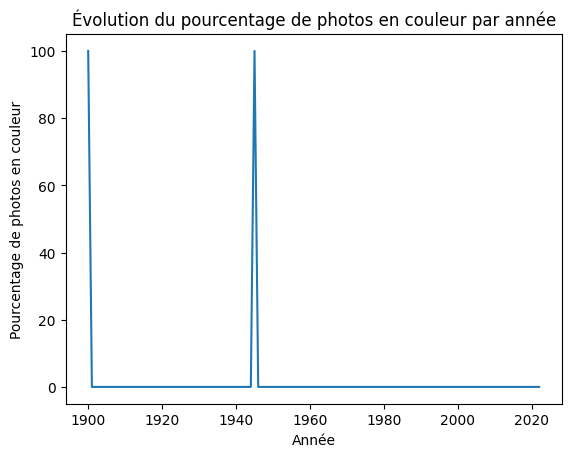

In [14]:
import os
import cv2
import matplotlib.pyplot as plt
from collections import Counter

def est_noir_et_blanc(image_path):
    img = cv2.imread(image_path)
    if len(img.shape) == 2:
        return True
    else:
        return False

# Chemin vers le dossier contenant les photos
dossier_photos =  r"C:\Users\chris\OneDrive\Documents\Python Scripts\chronophoto\photo_test"

annees = range(1900, 2023)
couleur_par_annee = {}

# Comptage du nombre total de photos pour chaque année
comptage_dates = Counter()

# Parcourir tous les fichiers dans le dossier
for fichier in os.listdir(dossier_photos):
    if fichier.lower().endswith((".jpg", ".jpeg")):
        # Extraire l'année du nom de fichier
        annee_fichier = int(fichier.split("-")[0])
        
        # Comptage du nombre de photos par année
        comptage_dates[annee_fichier] += 1

# Parcourir toutes les années
for annee in annees:
    couleur_par_annee[annee] = 0
    
    # Vérifier si l'année existe dans le comptage_dates
    if annee in comptage_dates:
        total_photos = comptage_dates[annee]
        
        # Parcourir tous les fichiers dans le dossier
        for fichier in os.listdir(dossier_photos):
            if fichier.lower().endswith((".jpg", ".jpeg")):
                # Extraire l'année du nom de fichier
                annee_fichier = int(fichier.split("-")[0])
                
                # Vérifier si l'année correspond
                if annee_fichier == annee:
                    # Vérifier si l'image est en couleur
                    image_path = os.path.join(dossier_photos, fichier)
                    if not est_noir_et_blanc(image_path):
                        couleur_par_annee[annee] += 1
        
        # Calculer le pourcentage de photos en couleur
        pourcentage_couleur = (couleur_par_annee[annee] / total_photos) * 100
        couleur_par_annee[annee] = pourcentage_couleur

# Générer le graphique
annees = list(couleur_par_annee.keys())
pourcentage_photos_couleur = list(couleur_par_annee.values())

plt.plot(annees, pourcentage_photos_couleur)
plt.xlabel("Année")
plt.ylabel("Pourcentage de photos en couleur")
plt.title("Évolution du pourcentage de photos en couleur par année")
plt.show()


Chemin de l'image en couleur : C:\Users\chris\OneDrive\Documents\Python Scripts\chronophoto\photo_test\1900-045.JPEG
Chemin de l'image en couleur : C:\Users\chris\OneDrive\Documents\Python Scripts\chronophoto\photo_test\1900-062.JPEG


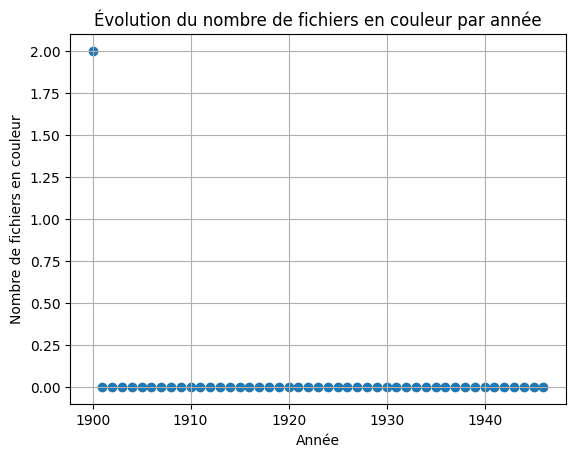

Valeurs de saturation en couleur : [19.431159663865547, 0.0]
Valeurs de saturation en noir et blanc : []


In [109]:
import os
import cv2
import matplotlib.pyplot as plt
from collections import Counter

def est_noir_et_blanc(image_path):
    img = cv2.imread(image_path)
    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    saturation_mean = img_hsv[:, :, 1].mean()
    return saturation_mean < 100  # Modifier la valeur seuil de saturation selon les besoins

def est_couleur(image_path, seuil_gris):
    img = cv2.imread(image_path)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Calculer la variance de l'image en échelle de gris
    variance = np.var(img_gray)

    return variance > seuil_gris

# Chemin vers le dossier contenant les photos
dossier_photos = r"C:\Users\chris\OneDrive\Documents\Python Scripts\chronophoto\photo_test"

annees = range(1900, 1947)
couleur_par_annee = {}
sat_couleur = []
sat_NB = []

# Comptage du nombre total de photos pour chaque année
comptage_dates = Counter()

# Parcourir tous les fichiers dans le dossier
for fichier in os.listdir(dossier_photos):
    if fichier.lower().endswith((".jpg", ".jpeg")):
        # Extraire l'année du nom de fichier
        annee_fichier = int(fichier.split("-")[0])

        # Comptage du nombre de photos par année
        comptage_dates[annee_fichier] += 1
seuil_gris=8200
# Parcourir toutes les années
for annee in annees:
    couleur_par_annee[annee] = 0

    # Vérifier si l'année existe dans le comptage_dates
    if annee in comptage_dates:
        total_photos = comptage_dates[annee]

        # Parcourir tous les fichiers dans le dossier
        for fichier in os.listdir(dossier_photos):
            if fichier.lower().endswith((".jpg", ".jpeg")):
                # Extraire l'année du nom de fichier
                annee_fichier = int(fichier.split("-")[0])

                # Vérifier si l'année correspond
                if annee_fichier == annee:
                    # Vérifier si l'image est en couleur
                    image_path = os.path.join(dossier_photos, fichier)

                    if est_couleur(image_path, seuil_gris):  # Modifier le seuil de variance selon les besoins
                        couleur_par_annee[annee] += 1
                        img_hsv = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2HSV)
                        saturation_mean = img_hsv[:, :, 1].mean()
                        sat_couleur.append(saturation_mean)
                        print(f"Chemin de l'image en couleur : {image_path}")
                        



# Créer une liste de nombres correspondant au nombre de fichiers en couleur par année
nb_fichiers_couleur = [couleur_par_annee[annee] for annee in annees]

# Afficher le nuage de points
plt.scatter(annees, nb_fichiers_couleur)
plt.grid(True)
plt.xlabel("Année")
plt.ylabel("Nombre de fichiers en couleur")
plt.title("Évolution du nombre de fichiers en couleur par année")
plt.show()

# Afficher les valeurs de saturation
print("Valeurs de saturation en couleur :", sat_couleur)
print("Valeurs de saturation en noir et blanc :", sat_NB)


Chemin de l'image en couleur : C:\Users\chris\OneDrive\Documents\Python Scripts\chronophoto\photo_test\1900-009.JPEG
Chemin de l'image en couleur : C:\Users\chris\OneDrive\Documents\Python Scripts\chronophoto\photo_test\1946-075.JPEG


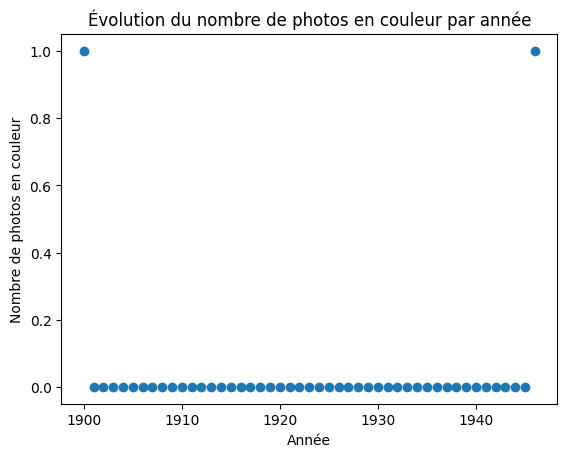

In [114]:
import os
import cv2
import matplotlib.pyplot as plt
from collections import Counter

def est_noir_et_blanc(image_path):
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ecart_couleur_moyen = (img_rgb[:,:,0] - img_rgb[:,:,1]).mean() + (img_rgb[:,:,0] - img_rgb[:,:,2]).mean() + (img_rgb[:,:,1] - img_rgb[:,:,2]).mean()
    return ecart_couleur_moyen < 500  # Modifier la valeur seuil d'écart de couleur selon les besoins

# Chemin vers le dossier contenant les photos
dossier_photos = r"C:\Users\chris\OneDrive\Documents\Python Scripts\chronophoto\photo_test"

annees = range(1900, 1947)
couleur_par_annee = {}

# Comptage du nombre total de photos pour chaque année
comptage_dates = Counter()

# Parcourir tous les fichiers dans le dossier
for fichier in os.listdir(dossier_photos):
    if fichier.lower().endswith((".jpg", ".jpeg")):
        # Extraire l'année du nom de fichier
        annee_fichier = int(fichier.split("-")[0])
        
        # Comptage du nombre de photos par année
        comptage_dates[annee_fichier] += 1

# Parcourir toutes les années
for annee in annees:
    couleur_par_annee[annee] = 0
    
    # Vérifier si l'année existe dans le comptage_dates
    if annee in comptage_dates:
        total_photos = comptage_dates[annee]
        
        # Parcourir tous les fichiers dans le dossier
        for fichier in os.listdir(dossier_photos):
            if fichier.lower().endswith((".jpg", ".jpeg")):
                # Extraire l'année du nom de fichier
                annee_fichier = int(fichier.split("-")[0])
                
                # Vérifier si l'année correspond
                if annee_fichier == annee:
                    # Vérifier si l'image est en couleur
                    image_path = os.path.join(dossier_photos, fichier)
                    if not est_noir_et_blanc(image_path):
                        couleur_par_annee[annee] += 1
                        print(f"Chemin de l'image en couleur : {image_path}")

# Créer une liste de nombres correspondant au nombre de photos en couleur par année
nb_photos_couleur = [couleur_par_annee[annee] for annee in annees]

# Afficher le nuage de points
plt.scatter(annees, nb_photos_couleur)
plt.xlabel("Année")
plt.ylabel("Nombre de photos en couleur")
plt.title("Évolution du nombre de photos en couleur par année")
plt.show()


r"C:\Users\chris\OneDrive\Documents\Python Scripts\chronophoto\photo_test"

In [116]:
import os
import cv2

def photo_en_couleur(image_path):
    img = cv2.imread(image_path)
    
    if img is None:
        print(f"Impossible de charger l'image : {image_path}")
        return False
    
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Extraire les canaux R, G, B
    r = img_rgb[:, :, 0]
    g = img_rgb[:, :, 1]
    b = img_rgb[:, :, 2]
    
    # Vérifier si la photo contient du bleu
    has_bleu = (b > r) & (b > g)
    
    return has_bleu.any()

# Chemin vers le dossier contenant les images
dossier_images = r"C:\Users\chris\OneDrive\Documents\Python Scripts\chronophoto\photo_test"

# Parcourir tous les fichiers dans le dossier
for fichier in os.listdir(dossier_images):
    if fichier.lower().endswith((".jpg", ".jpeg")):
        image_path = os.path.join(dossier_images, fichier)
        resultat = photo_en_couleur(image_path)
        print(f"Image : {fichier} - En couleur : {resultat}")


Image : 1900-001.JPEG - En couleur : False
Image : 1900-002.JPEG - En couleur : False
Image : 1900-003.JPEG - En couleur : False
Image : 1900-004.JPEG - En couleur : False
Image : 1900-005.JPEG - En couleur : True
Image : 1900-006.JPEG - En couleur : True
Image : 1900-007.JPEG - En couleur : False
Image : 1900-008.JPEG - En couleur : True
Image : 1900-009.JPEG - En couleur : True
Image : 1900-010.JPEG - En couleur : False
Image : 1900-011.JPEG - En couleur : True
Image : 1900-012.JPEG - En couleur : False
Image : 1900-013.JPEG - En couleur : False
Image : 1900-014.JPEG - En couleur : False
Image : 1900-015.JPEG - En couleur : True
Image : 1900-016.JPEG - En couleur : True
Image : 1900-017.JPEG - En couleur : True
Image : 1900-018.JPEG - En couleur : True
Image : 1900-019.JPEG - En couleur : True
Image : 1900-020.JPEG - En couleur : False
Image : 1900-021.JPEG - En couleur : False
Image : 1900-022.JPEG - En couleur : False
Image : 1900-023.JPEG - En couleur : False
Image : 1900-024.JPEG

In [ ]:
dossier_photos = r"C:\Users\chris\OneDrive\Documents\Python Scripts\chronophoto\photo_test"

In [143]:
import os
from PIL import Image

def est_en_couleur(image_path):
    image = Image.open(image_path)
    image = image.convert("RGB")
    
    # Récupérer l'histogramme des couleurs
    histogram = image.histogram()
    
    # Seuils maximums pour les canaux de couleurs
    seuil_rouge =255
    seuil_vert =255
    seuil_bleu =-255
    
    # Vérifier si l'image a des canaux de couleurs significatifs
    return histogram[0] > seuil_rouge or histogram[1] > seuil_vert or histogram[2] > seuil_bleu

# Chemin vers le dossier contenant les photos
dossier_photos = r"C:\Users\chris\OneDrive\Documents\Python Scripts\chronophoto\photo_test"

# Compteur pour le nombre d'images en couleur
nb_images_couleur = 0

# Parcourir tous les fichiers dans le dossier
for fichier in os.listdir(dossier_photos):
    if fichier.lower().endswith((".jpg", ".jpeg")):
        image_path = os.path.join(dossier_photos, fichier)
        est_couleur = est_en_couleur(image_path)
        if est_couleur:
            nb_images_couleur += 1
        print(f"Image {fichier}: {est_couleur}")

# Afficher le nombre total d'images en couleur
print(f"Nombre total d'images en couleur : {nb_images_couleur}")


Image 1900-002.JPEG: True
Image 1900-003.JPEG: True
Image 1900-004.JPEG: True
Image 1900-005.JPEG: True
Image 1900-006.JPEG: True
Image 1900-007.JPEG: True
Image 1900-008.JPEG: True
Image 1900-009.JPEG: True
Image 1900-010.JPEG: True
Image 1900-011.JPEG: True
Image 1900-014.JPEG: True
Image 1900-015.JPEG: True
Image 1900-016.JPEG: True
Image 1900-017.JPEG: True
Image 1900-018.JPEG: True
Image 1900-019.JPEG: True
Image 1900-020.JPEG: True
Image 1900-021.JPEG: True
Image 1900-022.JPEG: True
Image 1900-024.JPEG: True
Image 1900-026.JPEG: True
Image 1900-027.JPEG: True
Image 1900-028.JPEG: True
Image 1900-029.JPEG: True
Image 1900-030.JPEG: True
Image 1900-031.JPEG: True
Image 1900-033.JPEG: True
Image 1900-034.JPEG: True
Image 1900-035.JPEG: True
Image 1900-036.JPEG: True
Image 1900-037.JPEG: True
Image 1900-038.JPEG: True
Image 1900-039.JPEG: True
Image 1900-040.JPEG: True
Image 1900-041.JPEG: True
Image 1900-042.JPEG: True
Image 1900-043.JPEG: True
Image 1900-044.JPEG: True
Image 1900-0

In [123]:
!pip install Pillow

In [12]:
## import os
import cv2

# Chemin vers le dossier contenant les images
dossier_images = r"C:\Users\chris\OneDrive\Documents\Python Scripts\chronophoto\photos_echantillon_reduit"

# Seuil pour la classification en noir et blanc ou couleur (à ajuster selon vos besoins)
seuil = 100

# Liste pour stocker les caractéristiques des fichiers
caracteristiques = []

# Parcourir les fichiers dans le dossier
for index, fichier in enumerate(os.listdir(dossier_images)):
    if fichier.lower().endswith(('.jpg', '.jpeg')):
        chemin_image = os.path.join(dossier_images, fichier)

        # Charger l'image en RGB
        img = cv2.imread(chemin_image)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Convertir l'image en HSV
        img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

        # Extraire la composante H
        H = img_hsv[:, :, 0]

        # Calculer le mean_H
        mean_H = H.mean()

        # Classer en noir et blanc ou couleur en fonction du seuil
        if mean_H < seuil:
            couleur_ou_nb = 'Noir et blanc'
        else:
            couleur_ou_nb = 'Couleur'

        # Ajouter les caractéristiques du fichier à la liste
        caracteristiques.append([chemin_image,index, couleur_ou_nb, mean_H ])

# Afficher les caractéristiques des fichiers
for fichier in caracteristiques:
    print(fichier)


['C:\\Users\\chris\\OneDrive\\Documents\\Python Scripts\\chronophoto\\photos_echantillon_reduit\\1900-001.JPEG', 0, 'Noir et blanc', 22.67320486111111]
['C:\\Users\\chris\\OneDrive\\Documents\\Python Scripts\\chronophoto\\photos_echantillon_reduit\\1900-002.JPEG', 1, 'Noir et blanc', 0.0]
['C:\\Users\\chris\\OneDrive\\Documents\\Python Scripts\\chronophoto\\photos_echantillon_reduit\\1900-003.JPEG', 2, 'Noir et blanc', 0.0]
['C:\\Users\\chris\\OneDrive\\Documents\\Python Scripts\\chronophoto\\photos_echantillon_reduit\\1900-004.JPEG', 3, 'Noir et blanc', 0.0]
['C:\\Users\\chris\\OneDrive\\Documents\\Python Scripts\\chronophoto\\photos_echantillon_reduit\\1900-005.JPEG', 4, 'Noir et blanc', 66.5833967090708]
['C:\\Users\\chris\\OneDrive\\Documents\\Python Scripts\\chronophoto\\photos_echantillon_reduit\\1901-001.JPEG', 5, 'Noir et blanc', 18.17058905203235]
['C:\\Users\\chris\\OneDrive\\Documents\\Python Scripts\\chronophoto\\photos_echantillon_reduit\\1901-002.JPEG', 6, 'Noir et blanc'

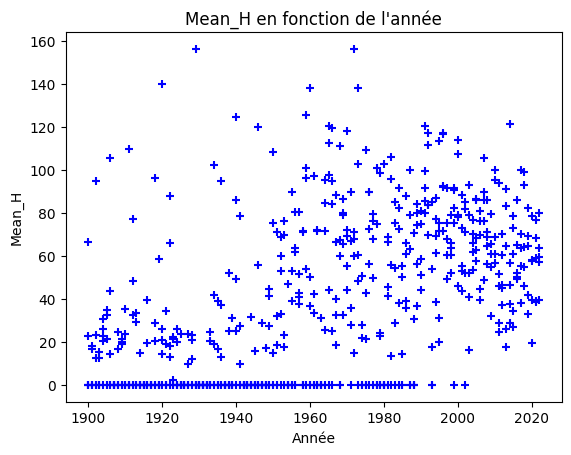

In [15]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Chemin vers le dossier contenant les images
dossier_images = r"C:\Users\chris\OneDrive\Documents\Python Scripts\chronophoto\photos_echantillon_reduit"

# Seuil pour la classification en noir et blanc ou couleur (à ajuster selon vos besoins)
seuil = 100

# Listes pour stocker les caractéristiques des fichiers
mean_H_values = []
annees = []
classification = []
chemins = []

# Parcourir les fichiers dans le dossier
for fichier in os.listdir(dossier_images):
    if fichier.lower().endswith(('.jpg', '.jpeg')):
        chemin_image = os.path.join(dossier_images, fichier)

        # Extraire l'année du nom du fichier
        annee = int(fichier.split('-')[0])

        # Charger l'image en RGB
        img = cv2.imread(chemin_image)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Convertir l'image en HSV
        img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

        # Extraire la composante H
        H = img_hsv[:, :, 0]

        # Calculer le mean_H
        mean_H = H.mean()

        # Classer en noir et blanc ou couleur en fonction du seuil
        if mean_H < seuil:
            couleur_ou_nb = 'Noir et blanc'
        else:
            couleur_ou_nb = 'Couleur'

        # Ajouter les caractéristiques du fichier aux listes
        mean_H_values.append(mean_H)
        annees.append(annee)
        classification.append(couleur_ou_nb)
        chemins.append(chemin_image)

# Tracer le graphique du mean_H en fonction de l'année
plt.figure()
plt.title('Mean_H en fonction de l\'année')
plt.xlabel('Année')
plt.ylabel('Mean_H')
plt.scatter(annees, mean_H_values, marker='+', c='blue')

"""# Afficher la classification de chaque fichier
for i in range(len(annees)):
    plt.text(annees[i], mean_H_values[i], f"{classification[i]}\n{chemins[i]}", ha='center', va='bottom')
"""
plt.show()


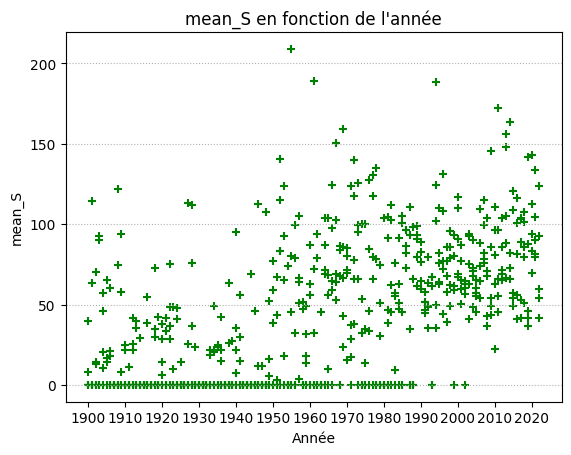

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Chemin vers le dossier contenant les images
dossier_images = r"C:\Users\chris\OneDrive\Documents\Python Scripts\chronophoto\photos_echantillon_reduit"

# Seuil pour la classification en noir et blanc ou couleur (à ajuster selon vos besoins)
seuil = 30

# Listes pour stocker les caractéristiques des fichiers
mean_S_values = []
annees = []
classification = []

# Parcourir les fichiers dans le dossier
for fichier in os.listdir(dossier_images):
    if fichier.lower().endswith(('.jpg', '.jpeg')):
        chemin_image = os.path.join(dossier_images, fichier)

        # Extraire l'année du nom du fichier
        annee = int(fichier.split('-')[0])

        # Charger l'image en RGB
        img = cv2.imread(chemin_image)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Convertir l'image en HSV
        img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

        # Extraire la composante S
        S = img_hsv[:, :, 1]

        # Calculer la moyenne de la composante S
        mean_S = np.mean(S)
        mean_S_values.append(mean_S)
        annees.append(annee)

        # Classification en noir et blanc ou couleur
        if mean_S < seuil:
            classification.append('Noir et Blanc')
        else:
            classification.append('Couleur')

# Tracer le graphique du mean_S en fonction de l'année avec quadrillage
plt.figure()
plt.title('mean_S en fonction de l\'année')
plt.xlabel('Année')
plt.ylabel('mean_S')
plt.scatter(annees, mean_S_values, marker='+', c='green')
plt.xticks(range(min(annees), max(annees)+1, 10))

# Ajouter le quadrillage pour chaque dizaine de mean_S en ordonnée
plt.grid(which='both', axis='y', linestyle=':')

plt.show()


In [2]:
len(mean_S_values)

615